<a href="https://colab.research.google.com/github/Shup-46/ML-project/blob/main/Spam_Mail_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Impoting libraries and loading dataset**

In [340]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
sns.set_palette("Set2")
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



In [341]:
# loading the dataset
data = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")

# **Exploratory data analysis (correlation and other graphs/charts)**

In [342]:
print(data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [343]:
data.shape
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [344]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [345]:
data["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [346]:
data.groupby("v2")["v1"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)

,len,amax
v2,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


In [347]:
data['length']=data['v2'].apply(len)
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [348]:
data.length.describe()
data[data['length']==910]['v2'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc229240b90>,
      dtype=object)

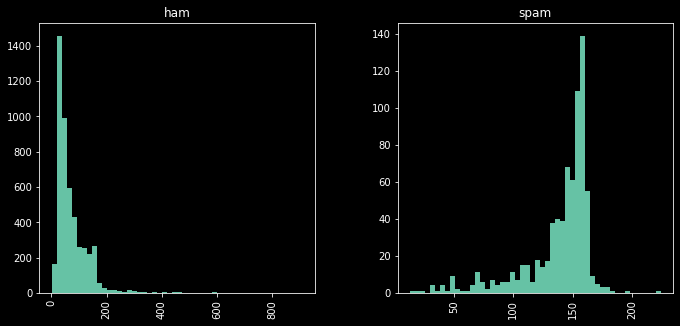

In [349]:
data.hist(column='length', by='v1', bins=50,figsize=(11,5))

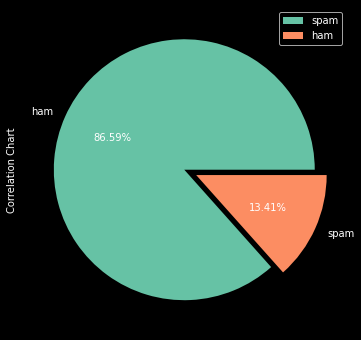

In [350]:
data["v1"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel("Correlation Chart")
plt.legend(["spam", "ham"])
plt.show()

# **Data Preprocessing Techniques**

In [351]:
data.shape

(5572, 6)

In [352]:
#Checking and removing duplicate data.
data.drop_duplicates(inplace = True)

In [353]:
data.shape

(5169, 6)

In [354]:
#Checking if there is any NaN or Na or null values
data.isnull().sum() 

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
length           0
dtype: int64

In [355]:
#Droping the null values
data.dropna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve..""",19
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)""",143
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe...",45
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\""""",92
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!""",70


In [359]:
#Droping the unnecessary culumns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4' ])

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [361]:
#unique values
data['v1'].unique()
data['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


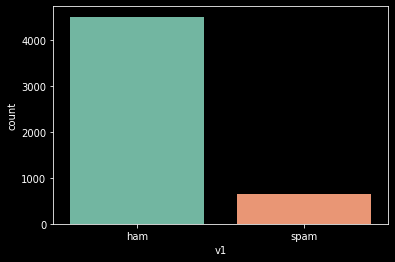

In [362]:
#Plot the unique values
sns.countplot(data['v1'])

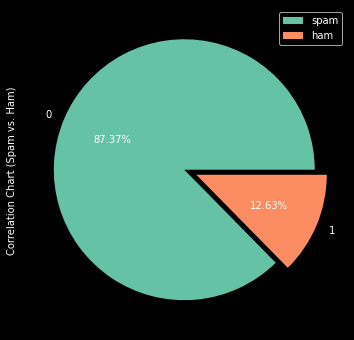

In [373]:
data["v1"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel("Correlation Chart (Spam vs. Ham)")
plt.legend(["spam", "ham"])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc22a4fd4d0>,
      dtype=object)

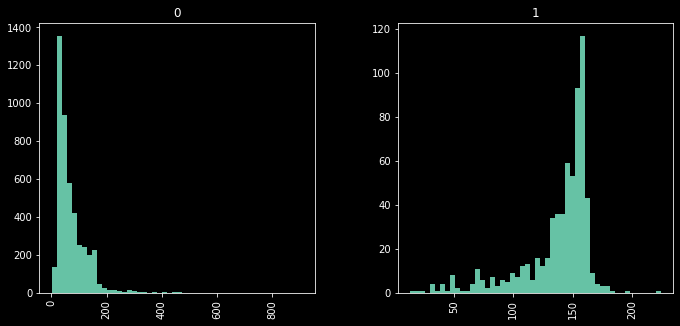

In [374]:
data.hist(column='length', by='v1', bins=50,figsize=(11,5))

In [375]:
# printing the first 5 rows of the dataframe
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [376]:
# labeling spam mail as 0;  ham mail as 1;
data.loc[data['v1'] == 'spam', 'v1',] = 1
data.loc[data['v1'] == 'ham', 'v1',] = 0

In [377]:
# separating the data as texts and label
x = data['v2']
y = data['v1']

In [378]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object


In [379]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: object


In [380]:
#splitting the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 0)

In [381]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5169,)
(4135,)
(1034,)


Feature Extraction

In [382]:
# Transforming the text data to feature vectors that can be used as input to the Logistic regression
f_ex = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
x_train = f_ex.fit_transform(x_train)
x_test = f_ex.transform(x_test)
# converting y_train and y_test values as integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [383]:
print(x_train)

  (0, 1824)	0.34380798500765586
  (0, 2301)	0.3739206954527555
  (0, 1207)	0.7031923967635516
  (0, 5384)	0.4974935538185745
  (2, 3807)	0.2552515853702222
  (2, 2314)	0.40237223721383025
  (2, 6985)	0.27464524414234204
  (2, 405)	0.3229285827629084
  (2, 246)	0.2810832438694085
  (2, 6095)	0.40237223721383025
  (2, 2407)	0.3596718026974256
  (2, 993)	0.40237223721383025
  (2, 3415)	0.24708682884679845
  (3, 3657)	0.23625416792839854
  (3, 4685)	0.20619375621964622
  (3, 7189)	0.23625416792839854
  (3, 1061)	0.23625416792839854
  (3, 6483)	0.12635722937309635
  (3, 1639)	0.23625416792839854
  (3, 2678)	0.23625416792839854
  (3, 903)	0.23625416792839854
  (3, 4142)	0.23625416792839854
  (3, 1355)	0.2172881597767389
  (3, 6816)	0.21834714722886078
  (3, 4693)	0.23625416792839854
  :	:
  (4128, 6412)	0.30984772756654433
  (4129, 6214)	0.7260098031001813
  (4129, 2200)	0.5826677268057332
  (4129, 6987)	0.36525071655162517
  (4130, 2194)	0.6524232078420963
  (4130, 3840)	0.7578548395761742


# **4 Different Models (ML algo/ NN)**

# **Naive Bayes**

In [384]:
#Creating Naive Bayes Classifier
model1 = MultinomialNB()

In [385]:
# training the Naive Bayes model with the training data
model1.fit(x_train, y_train)

MultinomialNB()

In [386]:
#Evaluating the model on the training data set
pred = model1.predict(x_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3631
           1       1.00      0.82      0.90       504

    accuracy                           0.98      4135
   macro avg       0.99      0.91      0.94      4135
weighted avg       0.98      0.98      0.98      4135


Confusion Matrix: 
 [[3631    0]
 [  90  414]]

Accuracy:  0.9782345828295043


In [387]:
#Evaluating the model on the testing data set
pr = model1.predict(x_test)
print(classification_report(y_test, pr))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pr))
print()
print('Accuracy: ', accuracy_score(y_test,pr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       885
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034


Confusion Matrix: 
 [[885   0]
 [ 42 107]]

Accuracy:  0.9593810444874274


**Confusion Matrix Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


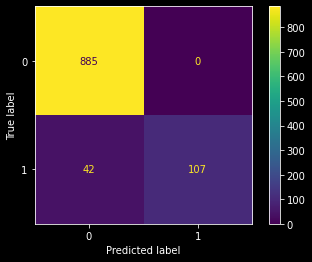

In [388]:
g = MultinomialNB()
g.fit(x_train, y_train)
plot_confusion_matrix(g, x_test, y_test)  
plt.show()

**ROC Graph**

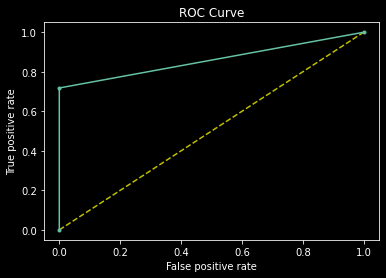

In [389]:
n_pred = model1.predict(x_test).ravel()
fpr,tpr,tresholds = roc_curve(y_test, n_pred)
plt.figure(1)
plt.plot([0,1], [0,1], 'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()


 **AUC (Area under curve)**

In [390]:
n_value = auc(fpr,tpr)
print("Area Under Curve:", n_value)

Area Under Curve: 0.8590604026845637


# **Logistic Regression**

In [391]:
#Creating Logistic Regression
model2 = LogisticRegression()

In [392]:
#Training with Logistic Regression
model2.fit(x_train, y_train)

LogisticRegression()

In [393]:
#Evaluating the model on the training data set
pred = model2.predict(x_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3631
           1       0.99      0.70      0.82       504

    accuracy                           0.96      4135
   macro avg       0.98      0.85      0.90      4135
weighted avg       0.96      0.96      0.96      4135


Confusion Matrix: 
 [[3628    3]
 [ 150  354]]

Accuracy:  0.9629987908101572


In [394]:
#Evaluating the model on the testing data set
p = model2.predict(x_test)
print(classification_report(y_test, p))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, p))
print()
print('Accuracy: ', accuracy_score(y_test,p))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       885
           1       0.99      0.70      0.82       149

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034


Confusion Matrix: 
 [[884   1]
 [ 45 104]]

Accuracy:  0.9555125725338491


 **Confusion Matrix Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


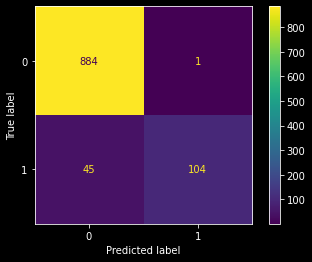

In [395]:
g = LogisticRegression(random_state=0)
g.fit(x_train, y_train)
plot_confusion_matrix(g, x_test, y_test)  
plt.show()

**ROC Curve**

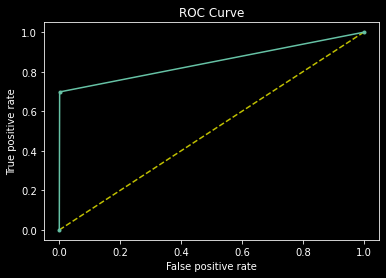

In [396]:
n_pred = model2.predict(x_test).ravel()
fpr,tpr,tresholds = roc_curve(y_test, n_pred)
plt.figure(1)
plt.plot([0,1], [0,1], 'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()


 **AUC (Area under curve)**

In [397]:
l_value = auc(fpr,tpr)
print("Area Under Curve:", l_value)

Area Under Curve: 0.8484283168391916


# **K-Nearest Neighbor**

In [398]:
#Creating K-Nearest Neighbor 
model3 = KNeighborsClassifier()

In [399]:
#Training with K-Nearest Neighbor 
model3.fit(x_train, y_train)

KNeighborsClassifier()

In [400]:
#Evaluating the model on the training data set
k = model3.predict(x_train)
print(classification_report(y_train, k))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, k))
print()
print('Accuracy: ', accuracy_score(y_train,k))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3631
           1       1.00      0.31      0.47       504

    accuracy                           0.92      4135
   macro avg       0.96      0.65      0.71      4135
weighted avg       0.92      0.92      0.90      4135


Confusion Matrix: 
 [[3631    0]
 [ 349  155]]

Accuracy:  0.9155985489721886


In [401]:
#Evaluating the model on the testing data set
n = model3.predict(x_test)
print(classification_report(y_test, n))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, n))
print()
print('Accuracy: ', accuracy_score(y_test,n))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       885
           1       1.00      0.26      0.41       149

    accuracy                           0.89      1034
   macro avg       0.94      0.63      0.68      1034
weighted avg       0.91      0.89      0.87      1034


Confusion Matrix: 
 [[885   0]
 [110  39]]

Accuracy:  0.8936170212765957


**Confusion Matrix Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


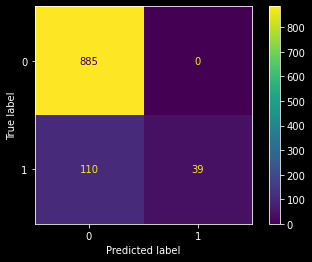

In [402]:
g = KNeighborsClassifier()
g.fit(x_train, y_train)
plot_confusion_matrix(g, x_test, y_test)  
plt.show()

**ROC Curve**

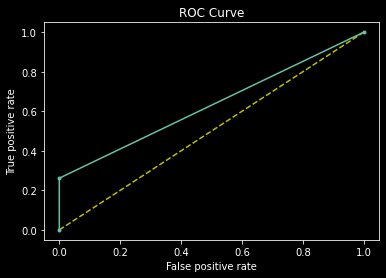

In [403]:
k_pred = model3.predict(x_test).ravel()
fpr,tpr,tresholds = roc_curve(y_test, k_pred)
plt.figure(1)
plt.plot([0,1], [0,1], 'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()



 **AUC (Area under curve)**

In [404]:
k_value = auc(fpr,tpr)
print("Area Under Curve:", k_value)

Area Under Curve: 0.6308724832214765


# **SVM** 

In [405]:
#Creating K-Nearest Neighbor Classifier
model4 = SVC()

In [406]:
#Training with K-Nearest Neighbor Classifier
model4.fit(x_train, y_train)

SVC()

In [407]:
#Evaluating the model on the training data set
s = model4.predict(x_train)
print(classification_report(y_train, s))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, s))
print()
print('Accuracy: ', accuracy_score(y_train,s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       1.00      0.99      0.99       504

    accuracy                           1.00      4135
   macro avg       1.00      0.99      1.00      4135
weighted avg       1.00      1.00      1.00      4135


Confusion Matrix: 
 [[3631    0]
 [   7  497]]

Accuracy:  0.9983071342200726


In [408]:
#Evaluating the model on the testing data set
k = model4.predict(x_test)
print(classification_report(y_test, k))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, k))
print()
print('Accuracy: ', accuracy_score(y_test,k))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       0.99      0.83      0.90       149

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034


Confusion Matrix: 
 [[884   1]
 [ 26 123]]

Accuracy:  0.9738878143133463


**Confusion Matrix Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


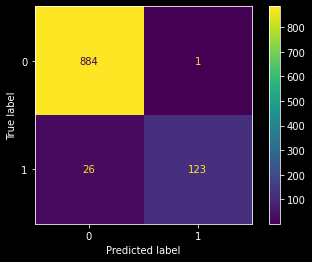

In [409]:
g = SVC(random_state=0)
g.fit(x_train, y_train)
plot_confusion_matrix(g, x_test, y_test)  
plt.show()

**ROC Curve**

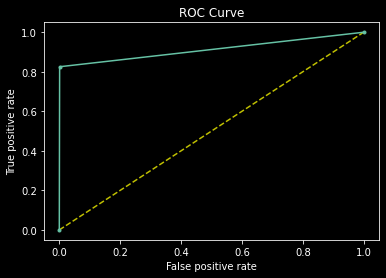

In [410]:
s_pred = model4.predict(x_test).ravel()
fpr,tpr,tresholds = roc_curve(y_test, s_pred)
plt.figure(1)
plt.plot([0,1], [0,1], 'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()



In [411]:
s_value = auc(fpr,tpr)
print("Area Under Curve:", s_value)

Area Under Curve: 0.9121867061009366


# **Result Analysis (AUC-ROC comparisons)**

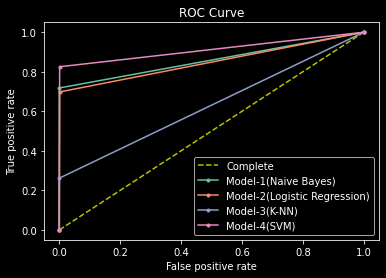



AUC of Model-1(Naive Bayes): 0.8590604026845637
AUC of Model-2(Logistic Regression) 0.8484283168391916
AUC of Model-3(K-NN) 0.6308724832214765
AUC of Model-4(SVM) 0.9121867061009366


In [412]:
n_pred = model1.predict(x_test).ravel()
l_pred = model2.predict(x_test).ravel()
k_pred = model3.predict(x_test).ravel()
s_pred = model4.predict(x_test).ravel()
fpr,tpr,tresholds = roc_curve(y_test, n_pred)
fpr1,tpr1,tresholds1 = roc_curve(y_test, l_pred)
fpr2,tpr2,tresholds2 = roc_curve(y_test, k_pred)
fpr3,tpr3,tresholds3 = roc_curve(y_test, s_pred)
plt.figure(1)
plt.plot([0,1], [0,1], 'y--')
plt.plot(fpr,tpr,marker='.')
plt.plot(fpr1,tpr1,marker='.')
plt.plot(fpr2,tpr2,marker='.')
plt.plot(fpr3,tpr3,marker='.')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(["Complete","Model-1(Naive Bayes)", "Model-2(Logistic Regression)","Model-3(K-NN)","Model-4(SVM)"])
plt.title("ROC Curve")
plt.show()
print()
print()
n_value = auc(fpr,tpr)
print("AUC of Model-1(Naive Bayes):", n_value)
l_value = auc(fpr1,tpr1)
print("AUC of Model-2(Logistic Regression)", l_value)
k_value = auc(fpr2,tpr2)
print("AUC of Model-3(K-NN)", k_value)
s_value = auc(fpr3,tpr3)
print("AUC of Model-4(SVM)", s_value)